# LAB WEEK 11 - CLUSTERING

**Student Name:** Tran Thi Hong Phuong </br>
**Student ID:** s3623386

# Introduction

In this lab, we will need to **import the following packages:**

- matplotlib.pyplot
- sklearn
- sklearn.metrics
- pandas
- numpy

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

Additionally, **perform the following imports:**

In [2]:
from sklearn import datasets
from sklearn.cluster import KMeans
from scipy.spatial import distance

# Data set

In this lab, we will be using the Iris data set. **Import the data set:**

In [3]:
iris = datasets.load_iris()

There are two parts in the iris variable, data (i.e `iris.data`) and target (i.e `iris.target`) which will be converted into separate Pandas dataframes.

In [4]:
# Store the inputs as a Pandas Dataframe and set the column names
x = pd.DataFrame(iris.data)
x.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

**Draw two scatterplots** to visualise the three types of iris flowers based on 

**1. sepal length and sepal width**</br>

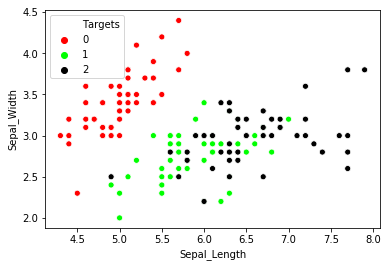

In [6]:
palette = ['red', 'lime', 'black']
sns.scatterplot(x=x.Sepal_Length, y=x.Sepal_Width, hue=y.Targets, palette=palette)

**2. petal length and petal width**

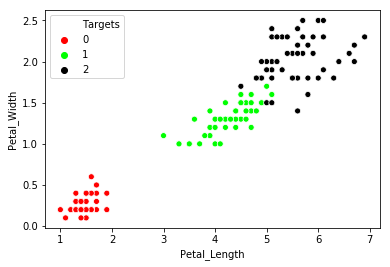

In [7]:
sns.scatterplot(x=x.Petal_Length, y=x.Petal_Width, hue=y.Targets, palette=palette)

Set the colours of the three types as **red, lime, and black**. Can you see the clusters in these scatterplots?

**Hint:** you can access different features of the data set in this way: `x.Sepal_length`, `x.Petal_Width` and so on.

# Build the K-means Model

First we **create the model and specify the number of clusters** the model should find (`n_clusters=3`) next we **fit the model to the data**.

In [8]:
# K Means Cluster
model = KMeans(n_clusters=3).fit(x)

After fitting the model, the predicted labels and cluster centers can be accessed via:

In [9]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [10]:
model.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

Try to print out the predictions and cluster centers. Print out the actual labels as well. Is there anything that you should particularly pay attention to?

With the predicted labels, you can create another scatterplot that uses these predictions to colour the data points. **Create two scatterplots that are next to each other, one uses the actual labels as the data points' colours and the other uses the predictions as the colours. Plot the cluster centers as well (can you interpret the output of the cluster centers?).**

C:\Users\Dell\Miniconda3\envs\tensorflow-gpu\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


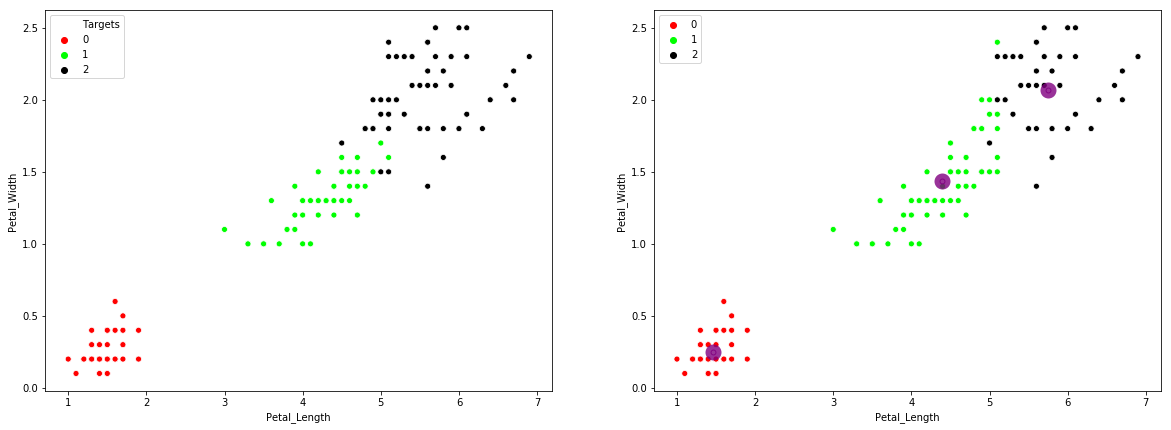

In [27]:
# Store clusters for easy access
clusters = model.cluster_centers_

fig, ax = plt.subplots(ncols=2, figsize=(20,7))

sns.scatterplot(x=x.Petal_Length, y=x.Petal_Width, hue=y.Targets, palette=palette, ax=ax[0])

sns.scatterplot(x=x.Petal_Length, y=x.Petal_Width, hue=model.labels_, palette=palette, ax=ax[1])
plt.scatter(clusters[0][2], clusters[0][3], c=['purple'], lw=10, alpha=0.8)
plt.scatter(clusters[1][2], clusters[1][3], c=['purple'], lw=10, alpha=0.8)
plt.scatter(clusters[2][2], clusters[2][3], c=['purple'], lw=10, alpha=0.8)

fig.show()

**Assign the predicted labels to a new variable called predY**. Although evaluating accuracy is not the primary purpose of clustering algorithms, you can still **measure the accuracy** of the results by:

In [28]:
predY = model.labels_

In [29]:
import sklearn.metrics as sm

# Performance Metrics
print(sm.accuracy_score(y, predY))

# Confusion Matrix
print(sm.confusion_matrix(y, predY))

0.8933333333333333
[[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]


**How good is the results' accuracy? What can be done to improve it?**

> *ANSWER:*

# Selecting K

Previously we selected `n_cluster = 3`, What if we select some other number. To determine optimal value of number of cluster, we will **implement Elbow method** to run k-means clustering on the dataset for a range of values of k (say, k from 1 to 10 in the examples above), and for each value of k **calculate the sum of squared errors (SSE)**.

In [30]:
# k means determine k
distortions = []
K = range(1,10)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(x)
    kmeanModel.fit(x)
    distortions.append(sum(np.min(distance.cdist(x, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / x.shape[0])

Then, **plot a line chart of the SSE for each value of k**. If the line chart looks like an arm, then the “elbow” on the arm is the value of k that is the best. The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is its own cluster, and there is no error between it and the center of its cluster).

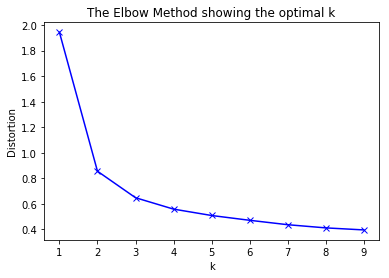

In [31]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

**What is the optimal number of k suggested by the figure? How do you determine that?**

> *ANSWER:* The figure suggests the optimal k is 3, because as k increases above 3, SSE does not have significant decrease anymore.

# Non-globular shape clustering

As discussed in the lecture, a challenge of clustering algorithms is classifying non-globular or non-spherical shapes. We can examine this in Python by comparing the clustering performed by K-Means algorithm and DBSCAN algorithm.

First, let's **generate some non-globular shape data:**

In [35]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

moon_x, moon_y = make_moons(500, noise=.1, random_state=0)

**Print out the variables `moon_x` and `y` to see how your data looks like. Plot a scatterplot by using these data points.** Feel free to change the parameters of the make_moons function and plot the scatterplot again to see the effects.

In [36]:
print('moon_x:', moon_x.shape)
print('moon_y:', moon_y.shape)

moon_x: (500, 2)
moon_y: (500,)


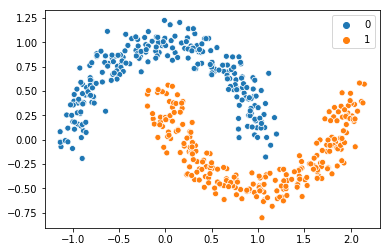

In [37]:
sns.scatterplot(moon_x[:,0], moon_x[:,1], hue=moon_y)

Next, **perform the same K-Means clustering** that you did before and **plot the results** (i.e., the predicted labels as colours and the cluster centers). **Choose k equals to 2**. Can you see that K-Means algorithm classified the clusters incorrectly?

In [38]:
model = KMeans(n_clusters=2).fit(moon_x)

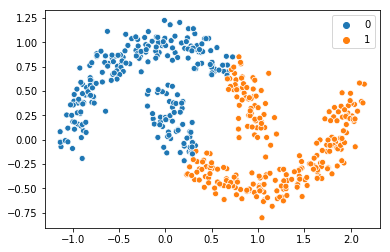

In [40]:
sns.scatterplot(moon_x[:,0], moon_x[:,1], hue=model.labels_)

Now, **perform DBSCAN algorithm to classify the data points**:

In [41]:
dbscan_model = DBSCAN(eps=0.12, min_samples = 2)
dbscan_pred = dbscan_model.fit_predict(moon_x)

Create a scatterplot with `dbscan_pred` as the colours of the data points. **How is the clustering result? Try to change the parameters of the DBSCAN function and see the effects by plotting the scatterplot again.**

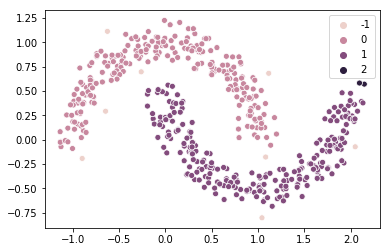

In [42]:
sns.scatterplot(moon_x[:,0], moon_x[:,1], hue=dbscan_pred)

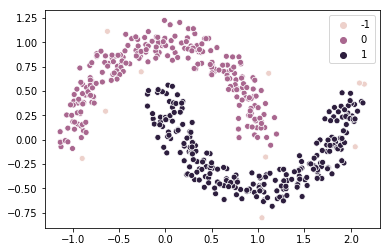

In [47]:
dbscan_model = DBSCAN(eps=0.12, min_samples = 3)
dbscan_pred = dbscan_model.fit_predict(moon_x)
sns.scatterplot(moon_x[:,0], moon_x[:,1], hue=dbscan_pred)

# Homework

Try the above method with the Wine data set. Determine the number of k, identify the appropriate number of clusters (through trial-and-error or with the Elbow method) and plot the results.

In [48]:
wine = datasets.load_wine()

wine_x = pd.DataFrame(wine.data)
wine_x.columns = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids',
                  'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
wine_y = pd.DataFrame(wine.target)
wine_y.columns = ['Targets']

In [49]:
wine_x.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [50]:
wine_y.head()

,Targets
0,0
1,0
2,0
3,0
4,0


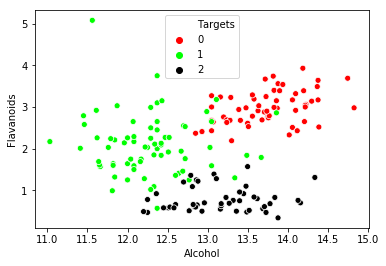

In [63]:
sns.scatterplot(wine_x['Alcohol'], wine_x['Flavanoids'], hue=wine_y['Targets'], palette=palette)

In [51]:
# k means determine k
distortions = []
K = range(1,10)

for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(wine_x)
    distortions.append(sum(np.min(distance.cdist(wine_x, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / wine_x.shape[0])

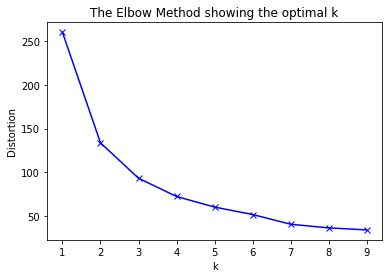

In [52]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

C:\Users\Dell\Miniconda3\envs\tensorflow-gpu\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


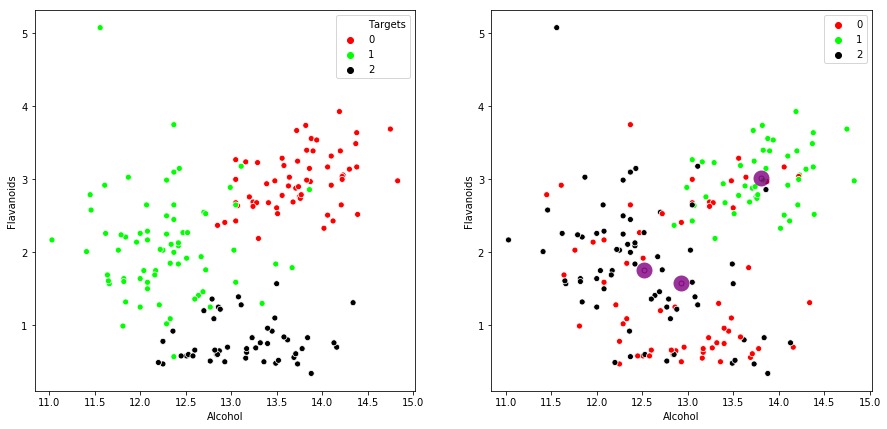

In [75]:
model = KMeans(n_clusters=3)
model.fit(wine_x)
clusters = model.cluster_centers_

fig, ax = plt.subplots(ncols=2, figsize=(15,7))

sns.scatterplot(wine_x['Alcohol'], wine_x['Flavanoids'], hue=wine_y['Targets'], palette=palette, ax=ax[0])
sns.scatterplot(wine_x['Alcohol'], wine_x['Flavanoids'], hue=model.labels_, palette=palette, ax=ax[1])
plt.scatter(clusters[0][0], clusters[0][6], c=['purple'], lw=10, alpha=0.8)
plt.scatter(clusters[1][0], clusters[1][6], c=['purple'], lw=10, alpha=0.8)
plt.scatter(clusters[2][0], clusters[2][6], c=['purple'], lw=10, alpha=0.8)

fig.show()